# **Exploratory Data Analysis and Business Problem Solving**

## **1. Exploratory Data Analysis**
In this section, we will analyze the dataset to answer key questions using SQL and Python:

- **Order Volume and Seasonality**: Analyze the monthly order volume and identify any seasonal trends in sales.
- **Delivery Time Distribution**: Examine the distribution of delivery times for orders.
- **Freight Cost vs. Delivery Distance**: Explore the relationship between freight cost and delivery distance.
- **Top Product Categories**: Identify the most sold product categories in terms of revenue.
- **Highest Average Order Value by State**: Determine which Brazilian states have the highest average order value.

---

## **2. Business Problem Solving**
We will address the following business challenges:

- **Retention Analysis**: Calculate the recurring customer rate (customers with more than one order) and extract insights to improve retention strategies.
- **Delay Prediction**: Build a simple classification model to predict whether an order will be delivered late:
  - Define what constitutes a late order.
  - Create relevant features for the model.
  - Split the dataset into training and testing sets.
  - Implement a classification model (e.g., Logistic Regression or Random Forest).
  - Evaluate the model's performance and explain the results.
- **Customer Segmentation**: Use clustering techniques to segment customers into groups, analyze their behavior, and suggest targeted marketing strategies.
- **Satisfaction Analysis**: Investigate the relationship between customer ratings and factors such as product category, delivery time, and order value to identify key drivers of customer satisfaction.

---

## **3. Visualizations and Dashboards**
We will create visualizations and dashboards to provide actionable insights:

- **Sales Dashboard**: Show the evolution of sales over time with filters for state and product category.
- **Heatmap of Sales Concentration**: Display a heatmap of sales concentration by region/state in Brazil.
- **Customer Rating vs. Delivery Time**: Visualize the relationship between customer ratings and delivery times.
- **Seller Performance Dashboard**: Highlight top-performing sellers based on sales volume, customer satisfaction, and delivery time.

This notebook will combine data analysis, machine learning, and visualization to provide insights and solutions for key business challenges.

## Setup and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime as dt
import sqlite3

# Machine Learning Libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.ensemble import RandomForestClassifier  # For Random Forest
from sklearn.ensemble import RandomForestRegressor # For Random Forest Regression
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler                   # For K-Means clustering
from sklearn.decomposition import PCA # For PCA dimensionality reduction
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation


## Exploratory Data Analysis

### Data Exploration

In [78]:
merged_data = pd.read_csv('data/processed_dataset/merged_data_clean.csv')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112637 entries, 0 to 112636
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112637 non-null  object 
 1   customer_id                    112637 non-null  object 
 2   order_status                   112637 non-null  object 
 3   order_purchase_timestamp       112637 non-null  object 
 4   order_approved_at              112637 non-null  object 
 5   order_delivered_carrier_date   112637 non-null  object 
 6   order_delivered_customer_date  112637 non-null  object 
 7   order_estimated_delivery_date  112637 non-null  object 
 8   customer_unique_id             112637 non-null  object 
 9   customer_zip_code_prefix       112637 non-null  int64  
 10  customer_city                  112637 non-null  object 
 11  customer_state                 112637 non-null  object 
 12  customer_lat                  

In [79]:
merged_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
2           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
3           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
4           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix  ... seller_lat seller_lng  payment_sequential  \
0                      3149  ... -23.680862 -46.444311                 1.0   
1                      3149  ... -23.680862 -46.444311                 2.0   
2                      3149  ... -23.680862 -46.444311                 3.0   
3                     47813  ... -19.807885 -43.980818                 1.0   
4                     75265  ... -21.363473 -48.229588                 1.0   

   payment_type  payment_installments payment_value  \
0   credit_card                   1.0         18.12   
1       voucher                   1.0         18.59   
2       voucher                   1.0          2.00   
3        boleto                   1.0        141.46   
4   credit_card                   3.0        179.12   

                          review_id  review_score  review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114           4.0   2017-10-11 00:00:00   
1  a54f0611adc9ed256b57ede6b6eb5114           4.0   2017-10-11 00:00:00   
2  a54f0611adc9ed256b57ede6b6eb5114           4.0   2017-10-11 00:00:00   
3  8d5266042046a06655c8db133d120ba5           4.0   2018-08-08 00:00:00   
4  e73b67b67587f7644d5bd1a52deb1b01           5.0   2018-08-18 00:00:00   

  review_answer_timestamp  
0     2017-10-12 03:43:48  
1     2017-10-12 03:43:48  
2     2017-10-12 03:43:48  
3     2018-08-08 18:37:50  
4     2018-08-22 19:07:58  

[5 rows x 41 columns]

In [80]:
merged_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'customer_lat', 'customer_lng', 'order_item_id',
       'product_id', 'seller_id', 'price', 'freight_value',
       'shipping_limit_date', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'seller_lat',
       'seller_lng', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [81]:
# Convert the datetime columns to datetime format
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

merged_data[datetime_columns] = merged_data[datetime_columns].apply(pd.to_datetime)

In [82]:
merged_data[datetime_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112637 entries, 0 to 112636
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       112637 non-null  datetime64[ns]
 1   order_approved_at              112637 non-null  datetime64[ns]
 2   order_delivered_carrier_date   112637 non-null  datetime64[ns]
 3   order_delivered_customer_date  112637 non-null  datetime64[ns]
 4   order_estimated_delivery_date  112637 non-null  datetime64[ns]
 5   shipping_limit_date            112637 non-null  datetime64[ns]
 6   review_creation_date           112637 non-null  datetime64[ns]
 7   review_answer_timestamp        112637 non-null  datetime64[ns]
dtypes: datetime64[ns](8)
memory usage: 6.9 MB


In [83]:
# Filter out the numbers dtypes columns
numeric_columns = merged_data.select_dtypes(include=[np.number])
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112637 entries, 0 to 112636
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_zip_code_prefix    112637 non-null  int64  
 1   customer_lat                112637 non-null  float64
 2   customer_lng                112637 non-null  float64
 3   order_item_id               112637 non-null  int64  
 4   price                       112637 non-null  float64
 5   freight_value               112637 non-null  float64
 6   product_name_lenght         112637 non-null  float64
 7   product_description_lenght  112637 non-null  float64
 8   product_photos_qty          112637 non-null  float64
 9   product_weight_g            112637 non-null  float64
 10  product_length_cm           112637 non-null  float64
 11  product_height_cm           112637 non-null  float64
 12  product_width_cm            112637 non-null  float64
 13  seller_zip_cod

In [84]:
# Select the columns to be converted to string
columns_to_string = [
    'order_item_id',
    'customer_zip_code_prefix',
    'seller_zip_code_prefix'
    ]
# Convert the specified columns to string
merged_data[columns_to_string] = merged_data[columns_to_string].astype(str)

In [85]:
merged_data[columns_to_string].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112637 entries, 0 to 112636
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   order_item_id             112637 non-null  object
 1   customer_zip_code_prefix  112637 non-null  object
 2   seller_zip_code_prefix    112637 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [86]:
# Filter out columns with srting dtypes
string_columns = merged_data.select_dtypes(include=[object])
string_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112637 entries, 0 to 112636
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   order_id                  112637 non-null  object
 1   customer_id               112637 non-null  object
 2   order_status              112637 non-null  object
 3   customer_unique_id        112637 non-null  object
 4   customer_zip_code_prefix  112637 non-null  object
 5   customer_city             112637 non-null  object
 6   customer_state            112637 non-null  object
 7   order_item_id             112637 non-null  object
 8   product_id                112637 non-null  object
 9   seller_id                 112637 non-null  object
 10  product_category_name     112637 non-null  object
 11  seller_zip_code_prefix    112637 non-null  object
 12  seller_city               112637 non-null  object
 13  seller_state              112637 non-null  object
 14  paym

In [87]:
# Filter out the numeric dtypes columns again
numeric_columns = merged_data.select_dtypes(include=[np.number])
numeric_columns.describe().transpose()

count         mean          std        min  \
customer_lat                112637.0   -21.244581     5.555053 -33.689890   
customer_lng                112637.0   -46.205748     4.039360 -72.668821   
price                       112637.0   119.874589   181.266335   0.850000   
freight_value               112637.0    19.994517    15.724954   0.000000   
product_name_lenght         112637.0    48.790353    10.020027   5.000000   
product_description_lenght  112637.0   784.759946   650.965951   4.000000   
product_photos_qty          112637.0     2.201666     1.713665   1.000000   
product_weight_g            112637.0  2104.531619  3759.828289   0.000000   
product_length_cm           112637.0    30.271314    16.137837   7.000000   
product_height_cm           112637.0    16.618110    13.447950   2.000000   
product_width_cm            112637.0    23.090299    11.710175   6.000000   
seller_lat                  112637.0   -22.793484     2.703800 -32.075303   
seller_lng                  112637.0   -47.249447     2.345108 -63.893789   
payment_sequential          112637.0     1.091107     0.688242   1.000000   
payment_installments        112637.0     2.941866     2.778133   0.000000   
payment_value               112637.0   171.608144   264.565310   0.000000   
review_score                112637.0     4.082273     1.346119   1.000000   

                                   25%         50%          75%           max  
customer_lat                -23.591175  -22.929004   -20.197823     42.184003  
customer_lng                -48.109939  -46.632945   -43.658299     -8.723762  
price                        39.900000   74.900000   133.000000   6735.000000  
freight_value                13.070000   16.310000    21.180000    409.680000  
product_name_lenght          42.000000   52.000000    57.000000     76.000000  
product_description_lenght  345.000000  600.000000   982.000000   3992.000000  
product_photos_qty            1.000000    1.000000     3.000000     20.000000  
product_weight_g            300.000000  700.000000  1800.000000  40425.000000  
product_length_cm            18.000000   25.000000    38.000000    105.000000  
product_height_cm             8.000000   13.000000    20.000000    105.000000  
product_width_cm             15.000000   20.000000    30.000000    118.000000  
seller_lat                  -23.609666  -23.424361   -21.757225     -2.503158  
seller_lng                  -48.829541  -46.756262   -46.522432    -34.855831  
payment_sequential            1.000000    1.000000     1.000000     26.000000  
payment_installments          1.000000    2.000000     4.000000     24.000000  
payment_value                60.770000  107.900000   189.150000  13664.080000  
review_score                  4.000000    5.000000     5.000000      5.000000

### Orders per Month


In [ ]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write your DataFrame to the SQLite database
merged_data.to_sql('merged_data', conn, index=False, if_exists='replace')

# Now you can run SQL queries on your DataFrame using pandas
query = """
SELECT 
    strftime('%Y-%m', order_purchase_timestamp) AS year_month,
    COUNT(DISTINCT order_id) AS order_count
FROM merged_data
GROUP BY year_month
ORDER BY year_month;
"""

orders_per_month = pd.read_sql_query(query, conn)
# Plotting the results
fig = px.line(
    orders_per_month,
    x='order_purchase_timestamp',
    y='order_id',
    markers=True,
    width=600,
    height=400,
    title='Orders per Month',
    labels={'order_id': 'Number of Orders', 'order_purchase_timestamp': 'Month'}
)
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Orders')
fig.show()

# Close the connection
conn.close()

### Distribution of order delivery time

In [89]:
merged_data['delivery_time'] = (
    merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']
).dt.days

fig = px.histogram(
    merged_data,
    x='delivery_time',
    nbins=30,
    title='Distribution of Delivery Time (days)',
    labels={'delivery_time': 'Delivery Time (days)'},
)
fig.update_layout(xaxis_title='Delivery Time (days)', yaxis_title='Order Count')
fig.show()

### Freight value vs. delivery distance

In [90]:
# Create a haversine function to calculate the distance between two points on the Earth
# given their latitude and longitude
def haversine(lat1, lng1, lat2, lng2):
    # Convert degrees to radians
    lat1, lng1, lat2, lng2 = map(np.radians, [lat1, lng1, lat2, lng2])
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlng/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Radius of Earth in kilometers
    return km

merged_data['delivery_distance_km'] = haversine(
    merged_data['seller_lat'],
    merged_data['seller_lng'],
    merged_data['customer_lat'],
    merged_data['customer_lng']
)
merged_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2018-08-13  af07308b275d755c9edb36a90c618231   
4                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

  customer_zip_code_prefix  ... payment_sequential payment_type  \
0                     3149  ...                1.0  credit_card   
1                     3149  ...                2.0      voucher   
2                     3149  ...                3.0      voucher   
3                    47813  ...                1.0       boleto   
4                    75265  ...                1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                   1.0          18.12  a54f0611adc9ed256b57ede6b6eb5114   
1                   1.0          18.59  a54f0611adc9ed256b57ede6b6eb5114   
2                   1.0           2.00  a54f0611adc9ed256b57ede6b6eb5114   
3                   1.0         141.46  8d5266042046a06655c8db133d120ba5   
4                   3.0         179.12  e73b67b67587f7644d5bd1a52deb1b01   

  review_score review_creation_date  review_answer_timestamp  delivery_time  \
0          4.0           2017-10-11      2017-10-12 03:43:48              8   
1          4.0           2017-10-11      2017-10-12 03:43:48              8   
2          4.0           2017-10-11      2017-10-12 03:43:48              8   
3          4.0           2018-08-08      2018-08-08 18:37:50             13   
4          5.0           2018-08-18      2018-08-22 19:07:58              9   

  delivery_distance_km  
0            18.538322  
1            18.538322  
2            18.538322  
3           849.520470  
4           514.407596  

[5 rows x 43 columns]

In [91]:
merged_data.delivery_distance_km.describe()

count    112637.000000
mean        596.539882
std         587.596277
min           0.000000
25%         189.196159
50%         432.440804
75%         791.035508
max        8677.917816
Name: delivery_distance_km, dtype: float64

In [92]:
# Plot the distribution of delivery distances
fig = px.histogram(
    merged_data,
    x='delivery_distance_km',
    nbins=30,
    title='Distribution of Delivery Distances (km)',
    labels={'delivery_distance_km': 'Delivery Distance (km)'},
)
fig.show()

In [93]:
conn = sqlite3.connect(':memory:')
merged_data.to_sql('merged_data', conn, index=False, if_exists='replace')

query = """
SELECT 
    delivery_distance_km, 
    delivery_time
FROM merged_data
WHERE delivery_distance_km IS NOT NULL AND delivery_time IS NOT NULL
"""

merged_data_sql_scatter = pd.read_sql_query(query, conn)
conn.close()


fig = px.scatter(
    merged_data_sql_scatter,
    x='delivery_distance_km',
    y='delivery_time',
    title='Delivery Distance vs. Delivery Time',
    width=600,
    height=400,
    labels={'delivery_distance_km': 'Delivery Distance (km)', 'delivery_time': 'Delivery Time (days)'}
)
fig.show()

### Best-selling product categories by revenue

In [94]:
# Run a SQL query to group by product category and sum the price
conn = sqlite3.connect(':memory:')
merged_data.to_sql('merged_data', conn, index=False, if_exists='replace')
query = """
SELECT 
    product_category_name, 
    SUM(price) AS total_revenue
FROM merged_data
GROUP BY product_category_name
ORDER BY total_revenue DESC
LIMIT 10
"""
category_revenue_sql = pd.read_sql_query(query, conn)
conn.close()

# Plot the revenue by product category
fig = px.bar(
    category_revenue_sql,
    x='product_category_name',
    y='total_revenue',
    title='Top 10 Product Categories by Revenue (SQL)',
    labels={'product_category_name': 'Product Category', 'total_revenue': 'Total Revenue'}
)
fig.show()

### States with the highest average order value

In [95]:
# Calculate average order value by customer state
conn = sqlite3.connect(':memory:')
merged_data.to_sql('merged_data', conn, index=False, if_exists='replace')

query = """
SELECT 
    customer_state, 
    AVG(price) AS avg_order_value
FROM merged_data
GROUP BY customer_state
ORDER BY avg_order_value DESC
LIMIT 10
"""
state_avg_order_value_sql = pd.read_sql_query(query, conn)
conn.close()

# Plot the average order value by customer state (SQL version)
fig = px.bar(
    state_avg_order_value_sql,
    x='customer_state',
    y='avg_order_value',
    title='Top 10 States by Average Order Value (SQL)',
    labels={'customer_state': 'State', 'avg_order_value': 'Average Order Value'}
)
fig.show()

## Business Problem Solving

### Retention Analysis

In [47]:
# Count the number of orders per customer
customer_order_counts = merged_data.groupby('customer_unique_id')['order_id'].nunique().reset_index()

# Identify recurring customers (more than one order)
recurring_customers = customer_order_counts[customer_order_counts['order_id'] > 1]

# Calculate recurring customer rate
total_customers = customer_order_counts.shape[0]
recurring_rate = len(recurring_customers) / total_customers

print(f"Recurring customer rate: {recurring_rate:.2%}")

# Insights
print(f"Total customers: {total_customers}")
print(f"Recurring customers: {len(recurring_customers)}")
print("A low recurring rate may indicate that most customers are one-time buyers. \n" 
"Strategies to improve retention could include loyalty programs, personalized offers,\nor improved post-purchase experience.")

Recurring customer rate: 2.95%
Total customers: 91019
Recurring customers: 2686
A low recurring rate may indicate that most customers are one-time buyers. 
Strategies to improve retention could include loyalty programs, personalized offers,
or improved post-purchase experience.


### Delay Prediction

In [48]:
# 1. Define a late order: delivered after the estimated delivery date
merged_data['is_late'] = (
    merged_data['order_delivered_customer_date'] > merged_data['order_estimated_delivery_date']
).astype(int)

# 2. Select relevant features
features = [
    'delivery_distance_km',
    'freight_value',
    'delivery_time',
    'price',
    'payment_value',
    'payment_installments'
]
# Drop rows with missing values in features or target
model_data = merged_data.dropna(subset=features + ['is_late'])

X = model_data[features]
y = model_data['is_late']

# 3. Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Use Logistic Regression (simple, interpretable)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# 5. Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 6. Brief explanation
print(
    "The model predicts whether an order will be late based on distance, freight, delivery time, price, and payment info.\n"
    "Logistic Regression is used for its simplicity and interpretability. Check precision, recall, and F1-score above to assess performance."
)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     20790
           1       0.81      0.56      0.66      1738

    accuracy                           0.96     22528
   macro avg       0.89      0.77      0.82     22528
weighted avg       0.95      0.96      0.95     22528

[[20559   231]
 [  767   971]]
The model predicts whether an order will be late based on distance, freight, delivery time, price, and payment info.
Logistic Regression is used for its simplicity and interpretability. Check precision, recall, and F1-score above to assess performance.


#### **Interpretation of Delay Prediction Model Results**

- **Overall accuracy:** 96%, indicating strong general performance.
- **On-time deliveries (class 0):**  
  - Precision: 96%, Recall: 99%, F1-score: 98% — the model is highly reliable at identifying on-time orders.
- **Late deliveries (class 1):**  
  - Precision: 81% — when the model predicts a late delivery, it is correct 81% of the time.
  - Recall: 56% — the model only identifies 56% of all actual late deliveries, missing nearly half.
  - F1-score: 66% — moderate balance between precision and recall for late orders.
- **Confusion matrix:**  
  - 20559 on-time orders correctly predicted, 231 on-time predicted as late.
  - 971 late orders correctly predicted, 767 late orders missed (predicted as on-time).

**Business Insights:**
- The model is highly effective at predicting on-time deliveries, but less sensitive to late deliveries.
- Many late deliveries are not flagged, which could impact customer satisfaction and operational planning.

**Recommendations:**
1. **Improve recall for late deliveries:**  
   - Use class weighting or oversample late deliveries to help the model better identify them.
2. **Feature engineering:**  
   - Add more predictive features (e.g., seller performance, region, time of year, weather, logistics data).
3. **Threshold adjustment:**  
   - Lower the classification threshold to increase recall for late deliveries if business impact justifies more false positives.
4. **Operational use:**  
   - Use the model as an early warning system, but combine with business rules or manual review for high-priority orders.

**Summary:**  
The model provides a strong baseline for predicting delivery delays, especially for on-time orders. To better support proactive customer service and logistics, focus on improving recall for late deliveries through data balancing, feature enrichment, and threshold tuning.

### Customer Segmentation

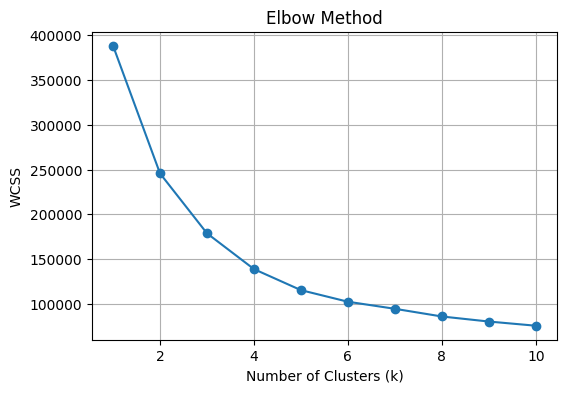

In [144]:
# 1. Aggregate customer features
customer_features = (
    merged_data.groupby('customer_unique_id')
    .agg(
        num_orders=('order_id', 'nunique'),
        avg_payment=('payment_value', 'mean'),
        avg_delivery_time=('delivery_time', 'mean'),
        avg_distance=('delivery_distance_km', 'mean')
    )
    .reset_index()
)

# 2. Remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

customer_features = remove_outliers(customer_features, 'avg_payment')
customer_features = remove_outliers(customer_features, 'avg_distance')

# 3. Prepare and scale features with is_recurring
customer_features['is_recurring'] = (customer_features['num_orders'] > 1).astype(int)
X_cluster = customer_features[['num_orders', 'avg_payment', 'avg_delivery_time', 'avg_distance', 'is_recurring']].fillna(0)
X_scaled = StandardScaler().fit_transform(X_cluster)

# 4. Calculate WCSS
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6, 4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# 6. K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(X_scaled)

# 7. Name clusters
cluster_labels = {
    0: "One-Time Low-Value",
    1: "One-Time High-Value",
    2: "Recurring Buyers"
}
customer_features['cluster_label'] = customer_features['cluster'].map(cluster_labels)

# 8. Apply PCA for visualization
# PCA (Principal Component Analysis) Explanation:
# - We have 5 features (num_orders, avg_payment, etc.), but a scatter plot can only show 2D.
# - PCA reduces 5D to 2D by creating new variables (PC1, PC2) that capture the most variation.
# - PC1: Direction of greatest variation (e.g., might combine avg_distance and avg_delivery_time).
# - PC2: Second most variation, perpendicular to PC1 (e.g., might involve num_orders and is_recurring).
# - Each customer gets a pca1 and pca2 value, plotted in 2D, showing clusters based on all features.
# - This fixes issues like "Recurring Buyers" clustering near zero, as PCA considers all 5 features.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
customer_features['pca1'] = X_pca[:, 0]
customer_features['pca2'] = X_pca[:, 1]
print(f"PCA Explained Variance: {pca.explained_variance_ratio_} (sum: {sum(pca.explained_variance_ratio_):.3f})")

# 9. Plot with Plotly using PCA
fig = px.scatter(
    customer_features,
    x='pca1',
    y='pca2',
    color='cluster_label',
    title=f'Customer Segmentation (K-Means, {n_clusters} Clusters)',
    labels={'pca1': 'PCA1', 'pca2': 'PCA2', 'cluster_label': 'Segment'}
)
fig.update_traces(marker=dict(size=8))
fig.show()

# 10. Verify clusters
print("\nCluster Summary:")
print(customer_features.groupby('cluster_label').mean(numeric_only=True))

PCA Explained Variance: [0.38293703 0.28164911] (sum: 0.665)



Cluster Summary:
                     num_orders  avg_payment  avg_delivery_time  avg_distance  \
cluster_label                                                                   
One-Time High-Value    1.000000    96.590206           7.661969    262.123639   
One-Time Low-Value     1.000000   138.066482          17.521646    806.120501   
Recurring Buyers       2.105749   118.164158          11.270187    457.667058   

                     is_recurring  cluster      pca1      pca2  
cluster_label                                                   
One-Time High-Value           0.0      1.0 -0.249179 -0.701297  
One-Time Low-Value            0.0      0.0 -0.226038  1.247492  
Recurring Buyers              1.0      2.0  7.606730 -0.063372  


#### Cluster Insights

1. One-Time High-Value Buyers
- **Profile:** One-time buyers (`num_orders`: 1.0), lowest spend (`avg_payment`: 96.59 BRL), fastest delivery (`avg_delivery_time`: 7.66 days), closest to sellers (`avg_distance`: 262.12 km), PCA: near zero (`pca1`: -0.25, `pca2`: -0.70).
- **Insight:** Cost-conscious, local customers who value fast delivery but don’t return.
- **Strategy:** Offer discounts on next purchase, emphasize fast delivery in marketing, and suggest low-cost bundles.

2. One-Time Low-Value Buyers
- **Profile:** One-time buyers (`num_orders`: 1.0), highest spend (`avg_payment`: 138.07 BRL), slowest delivery (`avg_delivery_time`: 17.52 days), farthest from sellers (`avg_distance`: 806.12 km), PCA: shifted (`pca1`: -0.23, `pca2`: 1.25).
- **Insight:** High-spending, distant customers deterred by slow delivery.
- **Strategy:** Improve delivery times for distant regions, re-engage with high-value offers, and introduce loyalty points.

3. Recurring Buyers
- **Profile:** Frequent buyers (`num_orders`: 2.11), moderate spend (`avg_payment`: 118.16 BRL), balanced delivery (`avg_delivery_time`: 11.27 days, `avg_distance`: 457.67 km), PCA: distinct (`pca1`: 7.61, `pca2`: -0.06).
- **Insight:** Loyal customers satisfied with service, buying often but spending moderately.
- **Strategy:** Reward with loyalty perks, cross-sell to increase spend, and maintain consistent delivery times.

---

* Additional Insights Across Clusters

- **Recurrence Challenge:** Only 2.95% are recurring (2,686/91,019). Both one-time clusters show `is_recurring=0.0`.
  - **Strategy:** Target "One-Time Low-Value" buyers for recurrence with better delivery.

- **Delivery Time Impact:** Faster delivery correlates with shorter distance ("One-Time High-Value": 7.66 days, 262 km; "Recurring Buyers": 11.27 days, 457 km; "One-Time Low-Value": 17.52 days, 806 km).
  - **Strategy:** Optimize delivery for distant customers to match closer ones.

- **Spending Patterns:** "One-Time Low-Value" spends most (138.07 BRL), "Recurring Buyers" less (118.16 BRL) but buy more often.
  - **Strategy:** Increase order frequency for "One-Time Low-Value" and per-order spend for "Recurring Buyers."

- **Geographic Targeting:** "One-Time High-Value" are closest (262 km), "One-Time Low-Value" farthest (806 km).
  - **Strategy:** Focus marketing on nearby regions, improve shipping for distant customers.

---

* Business Implications

- **Retention Focus:** Low recurrence (2.95%)—prioritize converting "One-Time Low-Value" buyers with faster delivery.
- **Delivery Optimization:** Reduce delivery times for distant customers to boost recurrence.
- **Segmented Marketing:** Tailor campaigns—low-cost incentives for "One-Time High-Value," high-value offers for "One-Time Low-Value," and loyalty rewards for "Recurring Buyers."

---

* Summary

Clusters show:
- **"One-Time High-Value"** (low spend, fast delivery, nearby)
- **"One-Time Low-Value"** (high spend, slow delivery, far)
- **"Recurring Buyers"** (moderate spend, frequent)

**Target "One-Time Low-Value" for recurrence with better delivery, reward "Recurring Buyers" with loyalty perks, and use incentives for "One-Time High-Value." Improve delivery for distant customers to grow recurrence.**

### Satisfacton Analysis

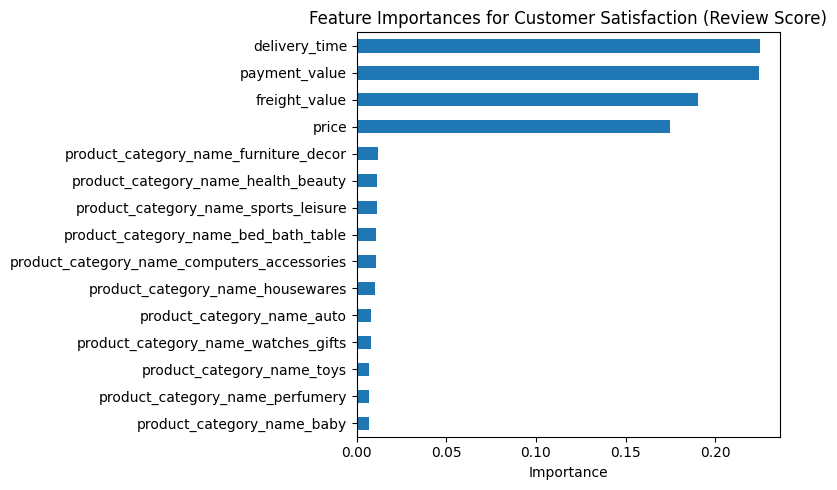

Top features impacting review score:
delivery_time                                  0.225009
payment_value                                  0.224690
freight_value                                  0.190436
price                                          0.174981
product_category_name_furniture_decor          0.012050
product_category_name_health_beauty            0.011390
product_category_name_sports_leisure           0.011382
product_category_name_bed_bath_table           0.010860
product_category_name_computers_accessories    0.010785
product_category_name_housewares               0.010113
product_category_name_auto                     0.007840
product_category_name_watches_gifts            0.007680
product_category_name_toys                     0.006916
product_category_name_perfumery                0.006601
product_category_name_baby                     0.006581
dtype: float64


In [150]:
# 1. Prepare the data (no need to dropna since merged_data is already clean)
features = [
    'delivery_time', 
    'payment_value', 
    'price', 
    'freight_value', 
    'product_category_name'
]
target = 'review_score'

# Encode categorical variable
satisfaction_data = pd.get_dummies(merged_data[features + [target]], columns=['product_category_name'], drop_first=True)

X = satisfaction_data.drop(columns=['review_score'])
y = satisfaction_data['review_score']

# 2. Fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 3. Extract and plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)[:15]  # Top 15 features

plt.figure(figsize=(8, 5))
importances.plot(kind='barh')
plt.title('Feature Importances for Customer Satisfaction (Review Score)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top features impacting review score:")
print(importances)

#### Satisfaction Analysis Results

The Random Forest model identified the following as the most important features impacting customer review scores:

#### **Top Numeric Drivers**
- **Delivery Time (0.225):** The time taken to deliver an order is the most influential factor. Longer delivery times are likely associated with lower review scores, highlighting the importance of fast and reliable delivery for customer satisfaction.
- **Payment Value (0.225):** The total amount paid by the customer is nearly as important as delivery time. Higher payment values may set higher expectations, affecting satisfaction if not met.
- **Freight Value (0.190):** The shipping cost significantly impacts satisfaction. High freight costs may lead to lower review scores if not justified by service.
- **Price (0.175):** The product price also plays a major role. Customers may be more critical when paying higher prices, especially if the perceived value is not met.

#### **Top Product Categories**
- **Furniture & Decor, Health & Beauty, Sports & Leisure, Bed Bath Table, Computers & Accessories, Housewares, Auto, Watches & Gifts, Toys, Perfumery, Baby:**  
  These specific product categories, while less influential than numeric features, still have a measurable impact on review scores. This suggests that customer satisfaction can vary by category, possibly due to differences in product expectations, delivery challenges, or after-sales service.

---

**Summary:**  
Customer satisfaction is most strongly influenced by delivery time, payment value, freight value, and price. Product category also matters, but to a lesser extent. To improve review scores, focus on reducing delivery times, optimizing pricing and shipping costs, and addressing category-specific issues.